Name(s):
Rohan Chugh
Julia Joseph

# Association Analysis

Association analysis uses machine learning to extract frequent itemsets and strong association rules from large datasets. In this assignment you'll be implementing one of the most commonly used algorithms for association rule mining - the Apriori algorithm.

The dataset (`large_retail.txt`) that we are going to use has been adapted from the [Retail Market Basket Dataset](http://fimi.ua.ac.be/data/retail.pdf). This dataset contains transaction records supplied by a Belgian retail supermarket store. Each line in the file represents a separate transaction with the item ids separated by space. The dataset has 3000 transactions and 99 different item ids.

You are also provided with a smaller dataset (`small_retail.txt`) with 9 transactions and 5 different item ids along with the solutions. You can test and debug your implementation on this smaller dataset.

## Apriori Algorithm from scratch

The Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. In this part, you'll be implementing this algorithm for generating the itemsets that occur enough times to meet the `min_sup` threshold.

**Implementation Hint:**

- Use the `frozenset` data structure in Python, which is similar to `set` in functionality, to represent the itemsets, because `frozenset` is an immutable (hashable) data structure. You can maintain a dictionary that maps from the itemset (a `frozenset`) to its support count.

In [ ]:
# Standard imports (you can add additional headers if you wish)
import numpy as np

In [ ]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()
        data = [[int(x) for x in line.rstrip().split()] for line in content]
    return data

In [ ]:
# Read in the small_retail dataset
small_dataset = load_dataset('small_retail.txt')
small_dataset


[[1, 2, 5],
 [2, 4],
 [2, 3],
 [1, 2, 4],
 [1, 3],
 [2, 3],
 [1, 3],
 [1, 2, 3, 5],
 [1, 2, 3]]

Q1. Implement the function `create_1_itemsets` that takes as input the entire dataset and returns a list of all the candidate 1-itemsets. For example, for `small_retail.txt` it should return:
~~~
[frozenset({1}),
 frozenset({2}),
 frozenset({3}),
 frozenset({4}),
 frozenset({5})]
 ~~~
 Please don't hardcode the item ids, your code should support item ids that are non-sequential.

In [ ]:
def create_1_itemsets(dataset):
    c1 = []
    unique_vals = set()
    for row in dataset:
        for num in row:
            unique_vals.add(num)
    for num in unique_vals:
        c1.append(frozenset([num]))
    # your code goes here
    return c1

print(create_1_itemsets(small_dataset))

[frozenset({1}), frozenset({2}), frozenset({3}), frozenset({4}), frozenset({5})]


Q2. Implement function `filter_candidates` that takes as input the candidate itemsets, the dataset, and the minumum support count `min_sup`, and filters out candidates that don't meet the support threshold.

Return a list of all the itemsets that meet `min_sup` (as a list of frozensets) and the support count information for all of them (as a `dict`).

In [ ]:
def filter_candidates(candidates, dataset, min_sup):
    retlist = []
    support_data = {}
    # your code goes here
    for candidate in candidates:
        found = 0
        for transaction in dataset:
            if all(elem in transaction for elem in candidate):
                found += 1
        if found >= min_sup:
            support_data[candidate] = found
            retlist.append(candidate)
        # get count of this candidate
    return retlist, support_data
# lst, counts = filter_candidates(create_1_itemsets(small_dataset), small_dataset, 1)
# print(lst)
# print(counts)


Q3. Implement the function `generate_next_itemsets` that takes in frequent itemsets of size `k` and generates candidate itemsets of size `k + 1`.

Use either the F(k-1) x F(k-1) or the F(k-1) x F(1) candidate generation method, then **filter the candidate list based on the apriori principle before returning it.**

In [ ]:
from itertools import combinations
def generate_next_itemsets(freq_sets):
    # print(freq_sets)
    retlist = []
    # your code goes here
    for i in range(len(freq_sets)):
        for j in range(i+1, len(freq_sets)):
            items_one = freq_sets[i]
            items_two = freq_sets[j]
            candidate = items_one | items_two
            # all but last elem are the same
            if len(candidate) == (len(items_one) + 1):
                if all(frozenset(subset) in freq_sets for subset in combinations(candidate, len(candidate)-1)) and candidate not in retlist:
                    retlist.append(candidate)




    return retlist



Q4. Implement the function `apriori_freq_itemsets` that takes the entire dataset as input and returns all the frequent itemsets that meet `min_sup`.

In [ ]:
def apriori_freq_itemsets(dataset, minsup):
    for lst in dataset:
        lst.sort()
    retlist = []
    support_data = {}
    # generate valid 1-itemsets
    one_items = create_1_itemsets(dataset)
    valid_candidates, support_data = filter_candidates(one_items, dataset, minsup)
    retlist += valid_candidates
    # continue looping until no new itemsets are generated
    while(True):
        candidates = generate_next_itemsets(valid_candidates)
        valid_candidates, valid_support_counts = filter_candidates(candidates, dataset, minsup)
        if len(valid_candidates) == 0:
            break
        retlist += valid_candidates
        for key in valid_support_counts:
            support_data[key] = valid_support_counts[key]



    # your code goes here
    return retlist, support_data
retlst, supp = apriori_freq_itemsets(small_dataset, 2)
print(retlst)



[frozenset({1}), frozenset({2}), frozenset({3}), frozenset({4}), frozenset({5}), frozenset({1, 2}), frozenset({1, 3}), frozenset({1, 5}), frozenset({2, 3}), frozenset({2, 4}), frozenset({2, 5}), frozenset({1, 2, 3}), frozenset({1, 2, 5})]


Q5. Display the frequent item sets in the form of a table along with their `support` (as a fraction: support count over number of transactions) for the `large_retail.txt` dataset **with a min support count of 300**.

Sample Table Format (tab separated table)

~~~
Sup     Freq Itemset
0.67	[1]
0.44	[1, 2]
(and so on)
...
...
~~~

`support(itemset) = support_count(itemset) / num_total_transactions`.

The `support` and the itemset should be separated by a tab (`'\t'`).

Note that the `support` should be rounded to the nearest 2 decimal places (use `round(sup, 2)`). If a support_fraction only contains 1 decimal place (for example, 0.1), you do not need to add a 0 to the end of it (leaving it as 0.1 is fine).

The itemsets should also be in a sorted order where smaller itemsets should come before larger itemsets and itemsets of the same size should be sorted amongst themselves.

For eg.
~~~~
[1, 2] should come before [1, 2, 3]
[1, 2, 3] should come before [1, 2, 4]
[1, 2, 3] should come before [1, 4, 5]
[1, 2, 3] should come before [2, 3, 4]
~~~~

Note that **this order is very important for grading!**

The output also shouldn't contain any duplicates.

The sample output for the `small_retail.txt` dataset with `min_sup` set to 2 is:

~~~~
Sup     Freq Itemset
0.67	[1]
0.78	[2]
0.67	[3]
0.22	[4]
0.22	[5]
0.44	[1, 2]
0.44	[1, 3]
0.22	[1, 5]
0.44	[2, 3]
0.22	[2, 4]
0.22	[2, 5]
0.22	[1, 2, 3]
0.22	[1, 2, 5]
~~~~


In [ ]:
# your code goes here

a, b = apriori_freq_itemsets(small_dataset, 2)
# print("Sup\tFreq Itemset")
# for itemset in a:
#     sup = str(round(b[itemset] / len(small_dataset), 2))
#     print(sup + "\t" + str(sorted(list(itemset))))
large_dataset = load_dataset('large_retail.txt')
retlist, supp_data = apriori_freq_itemsets(large_dataset, 300)
print("Sup\tFreq Itemset")
for itemset in retlist:
    sup = str(round(supp_data[itemset] / len(large_dataset), 2))
    print(sup + "\t" + str(sorted(list(itemset))))



Sup	Freq Itemset
0.1	[31]
0.14	[32]
0.11	[36]
0.26	[38]
0.53	[39]
0.22	[41]
0.47	[48]
0.11	[60]
0.11	[65]
0.11	[89]
0.14	[32, 39]
0.15	[38, 39]
0.13	[38, 48]
0.14	[39, 41]
0.33	[39, 48]
0.18	[41, 48]
0.14	[39, 41, 48]


Q6. Find the closed frequent item sets. Display results for the `large_retail.txt` dataset in the same format as specified in Q5.

The results for the `small_retail` dataset are as follows:

~~~~
Sup	Freq Itemset
0.0	[1]
0.0	[2]
0.0	[3]
0.0	[1, 2]
0.0	[1, 3]
0.0	[2, 3]
0.0	[2, 4]
0.0	[1, 2, 3]
0.0	[1, 2, 5]
~~~~

In [ ]:
def closed_freq_itemsets(support_data):
    closed_sets = []

    for i, itemset in enumerate(support_data.keys()):
        is_closed = True
        for j, other_itemset in enumerate(support_data.keys()):
            if i != j and itemset.issubset(other_itemset) and support_data[itemset] == support_data[other_itemset]:
                is_closed = False
                break
        if is_closed:
            closed_sets.append(itemset)


    return closed_sets

retlist, support_data = apriori_freq_itemsets(large_dataset, 300)
closed = closed_freq_itemsets(support_data)
print("Sup\tFreq Itemset")
for itemset in closed:
    # if(itemset in retlist):
    sup = str(round(support_data[itemset] / len(large_dataset), 2))
    print(sup + "\t" + str(sorted(list(itemset))))

Sup	Freq Itemset
0.1	[31]
0.11	[36]
0.26	[38]
0.53	[39]
0.22	[41]
0.47	[48]
0.11	[60]
0.11	[65]
0.11	[89]
0.14	[32, 39]
0.15	[38, 39]
0.13	[38, 48]
0.33	[39, 48]
0.18	[41, 48]
0.14	[39, 41, 48]


## Extra Credit (+5 points)

Q7. Now, generate the strong rules from the frequent itemsets. Given a dictionary of frequent itemsets and their supports, generate all the rules having confidence above some provided `min_conf` threshold. Display the rules in the form of a table.

Sample table format (tab separated table):

~~~
Sup     Conf    Rule
0.44	0.67	[1] -> [2]
0.22	1.0	 [5] -> [1, 2]
0.22	1.0	 [2, 5] -> [1]
(and so on)
...
...
~~~

Rule confidence should be rounded to the nearest 2 decimal places (use `round(conf, 2)`). This table should also be tab (`'\t'`) separated. The rules should be displayed in a sorted order. If a rule is given as `LHS -> RHS` then the rules for which `len(LHS)` is lesser should appear first. If the `len(LHS)` is equal for two rules then rules for which `len(RHS)` is lesser should appear first. If both `len(LHS)` and `len(RHS)` is equal then the rules should be sorted based on LHS first and then based on RHS.

~~~~
Note:
LHS (Left Hand Side)
RHS (Right Hand Side)
~~~~

For eg.
~~~~
[3] -> [2] should come before [1, 3] -> [4]
[4] -> [2] should come before [2] -> [3, 4]
[1, 3] -> [2] should come before [1, 5] -> [2]
[1, 2] -> [3] should come before [1, 2] -> [5]
~~~~

Note that **this order is important for grading**.

The sample output for the `small_retail` dataset with `min_conf = 0.5` is:

~~~~
Sup	 Conf	Rule
0.44	0.67	[1] -> [2]
0.44	0.67	[1] -> [3]
0.44	0.57	[2] -> [1]
0.44	0.57	[2] -> [3]
0.44	0.67	[3] -> [1]
0.44	0.67	[3] -> [2]
0.22	1.0	 [4] -> [2]
0.22	1.0	 [5] -> [1]
0.22	1.0	 [5] -> [2]
0.22	1.0	 [5] -> [1, 2]
0.22	0.5	 [1, 2] -> [3]
0.22	0.5	 [1, 2] -> [5]
0.22	0.5	 [1, 3] -> [2]
0.22	1.0	 [1, 5] -> [2]
0.22	0.5	 [2, 3] -> [1]
0.22	1.0	 [2, 5] -> [1]
~~~~

In [ ]:
def compare(rule1, rule2):
    if len(rule1[0]) != len(rule2[0]):
        return len(rule1[0]) - len(rule2[0])

    if len(rule1[1]) != len(rule2[1]):
        return len(rule1[1]) - len(rule2[1])

    if rule1[0] != rule2[0]:
        for i in range(len(rule1[0])):
            elem1 = rule1[0][i]
            elem2 = rule2[0][i]
            if elem1 != elem2:
                return elem1 - elem2
    if rule1[1] != rule2[1]:
        for i in range(len(rule1[1])):
            elem1 = rule1[1][i]
            elem2 = rule2[1][i]
            if elem1 != elem2:
                return elem1 - elem2
    # should never happen...
    return 0

In [ ]:
from functools import cmp_to_key
def generate_rules(support_data, minconf):
    rules = []
    # print(support_data.keys())
    for itemset in support_data.keys():
        # rule represented as [LHS,RHS,conf] where LHS and RHS type = []
        # gen 1-item RHS rules
        curr_rules = []
        if(len(itemset) <= 1):
            continue
        for RHS in combinations(itemset, 1):
            RHS = frozenset(RHS)
            LHS = frozenset(itemset-RHS)
            conf = support_data[itemset] / support_data[LHS]
            if conf >= minconf:
                rules.append([sorted(list(LHS)),sorted(list(RHS)),conf])
                curr_rules.append([LHS,RHS,conf])
        # now generate the rest of the rules

        # double pointer loop to merge rules
        for num in range(len(itemset)-2):
            temp_rules = []
            for i in range(len(curr_rules)):
                for j in range(i+1, len(curr_rules)):
                    RHS = curr_rules[i][1] | curr_rules[j][1]
                    LHS = frozenset(itemset - RHS)
                    # print(LHS)
                    # print(LHS)
                    conf = support_data[itemset] / support_data[LHS]
                    if conf >= minconf:
                        temp_rules.append([LHS,RHS,conf])
                        rules.append([sorted(list(LHS)),sorted(list(RHS)),conf])
            curr_rules = temp_rules




        # for i in range(1, len(itemset)):
        #   for left_side in combinations(itemset, i):
        #     left_side = frozenset(left_side)
        #     right_side = itemset - left_side
        #     conf = support_data[itemset]/support_data[left_side]
        #     if conf >= minconf:
        #       rules.append([support_data[left_side]/len(itemset), round(conf, 2), left_side, right_side])
    # print("\n\n\n\n\n\n")
    # for rule in rules:
        # print(f"{sorted(list(rule[0]))} -> {sorted(list(rule[1]))}, conf: {rule[2]}")
    # print(rules)
    # rules.sort(key=lambda x: (len(x[0]), len(x[1]), x[1], x[2]))
    # rules.sort(key = sorting_func)
    rules = sorted(rules, key=cmp_to_key(compare))
    return rules



retlist, support_data1 = apriori_freq_itemsets(small_dataset, 2)
rules = generate_rules(support_data1, 0.5)
print("small dataset:")
print("Sup\tConf\tRule")
for r in rules:
    sup = support_data1[frozenset(r[0]) | frozenset(r[1])] / len(small_dataset)
    print("{}\t{}\t{} -> {}".format(round(sup, 2), round(r[2],2), sorted(list(r[0])), sorted(list(r[1]))))

print()
retlist, support_data1 = apriori_freq_itemsets(large_dataset, 300)
rules = generate_rules(support_data1, 0.5)
print("large dataset:")
print("Sup\tConf\tRule")
for r in rules:
    sup = support_data1[frozenset(r[0]) | frozenset(r[1])] / len(large_dataset)
    print("{}\t{}\t{} -> {}".format(round(sup, 2), round(r[2],2), sorted(list(r[0])), sorted(list(r[1]))))





small dataset:
Sup	Conf	Rule
0.44	0.67	[1] -> [2]
0.44	0.67	[1] -> [3]
0.44	0.57	[2] -> [1]
0.44	0.57	[2] -> [3]
0.44	0.67	[3] -> [1]
0.44	0.67	[3] -> [2]
0.22	1.0	[4] -> [2]
0.22	1.0	[5] -> [1]
0.22	1.0	[5] -> [2]
0.22	1.0	[5] -> [1, 2]
0.22	0.5	[1, 2] -> [3]
0.22	0.5	[1, 2] -> [5]
0.22	0.5	[1, 3] -> [2]
0.22	1.0	[1, 5] -> [2]
0.22	0.5	[2, 3] -> [1]
0.22	1.0	[2, 5] -> [1]

large dataset:
Sup	Conf	Rule
0.14	1.0	[32] -> [39]
0.15	0.58	[38] -> [39]
0.33	0.62	[39] -> [48]
0.14	0.64	[41] -> [39]
0.18	0.8	[41] -> [48]
0.33	0.7	[48] -> [39]
0.14	0.64	[41] -> [39, 48]
0.14	1.0	[39, 41] -> [48]
0.14	0.8	[41, 48] -> [39]


## Part 2 - Association Analysis using MLXtend

## Installation
`scikit-learn` does not provide any functionality for association rule mining so for this assignment you will be using the `MLxtend` library. The documentation for this library is available [here](http://rasbt.github.io/mlxtend/).

You will need to install the `MLxtend` library. There are several ways of doing this; you can follow the instructions below, or see the setup guide  [here](http://rasbt.github.io/mlxtend/installation/).


### Conda

If you downladed Anaconda in order to get Jupyter Notebooks (which is the most common way to get Jupyter Notebooks), then you will want to install `MLxtend` using Conda.

Open a command prompt / terminal window and type:

`conda install mlxtend --channel conda-forge`

### PyPi

You can also install via pip.
Note: If you are running Jupyter notebooks through an Anaconda install, then pip may not place the `MLxtend` libraries in the correct place for use in Jupyter (which is why you should use Conda instead of pip, if you downloaded Anaconda).

Open a command prompt / terminal window and type:

`pip3 install mlxtend`

### Google Colab

If you are using Google Colab, you can install MLXtend via a pip install command with an exclamation point in front of it, in one of your notebook cells. The exclamation points allows you to put shell commands inside of Colab.

In a cell in your Colab notebook, type:

`!pip install mlxtend`


In [ ]:
!pip install mlxtend
%pip install mlxtend --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## Dataset
For the second part of this assignment, the data we'll use comes from a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 2016-10-30 to 2017-04-09.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products purchased.

In this part, you'll be running the Apriori algorithm from the MLxtend library to generate the itemsets that occur more than the `min_sup` threshold. Based on these frequent itemsets, you'll find association rules that have confidence above the `min_conf` threshold.

In [ ]:
# Standard imports (you can add additional headers if you wish)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [ ]:
%matplotlib inline

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset = load_dataset('BreadBasket_DMS.csv')

# ** NOTE: dataset is a 2D list (not a dataframe!) **

print("Num transactions:", len(dataset))
#Print the first 10 transactions
dataset[:10]

Num transactions: 9531


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

Q8. Data Cleaning: Many transactions in the dataset include the item "NONE." First, find and remove all the "NONE" items from the dataset. There are some transactions that only contain "NONE," so removing "NONE" will leave some transactions as empty lists. Remove all the empty lists as well.

Once you have removed the NONEs, find the top 10 best-selling items in the bakery. Create a bar chart to display the total number of transactions for each of the top 10 selling items. Sort the bar chart by frequency (the top most sold item first, down to the 10th most sold item).

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


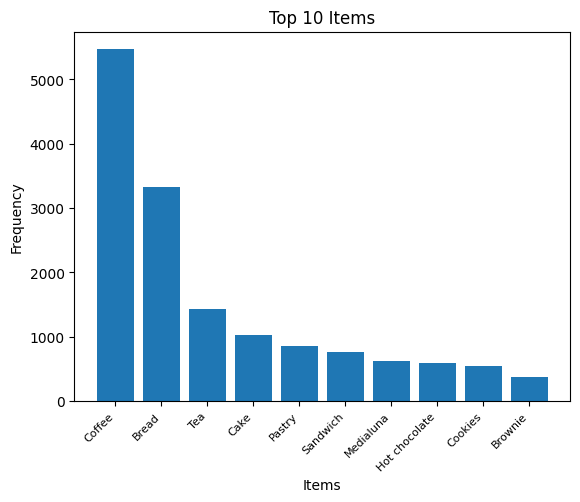

In [ ]:
# your code goes here
new_ds = []
for transaction in dataset:
    while "NONE" in transaction:
        transaction.remove("NONE")
    if len(transaction) != 0:
        new_ds.append(transaction)

dataset = new_ds


counts = {}
for transaction in dataset:
    for item in transaction:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1

sorted_dict = dict(sorted(counts.items(), reverse = True, key = lambda item: item[1]))

# print(sorted_dict)
labels = list(sorted_dict.keys())[:10]
values = list(sorted_dict.values())[:10]

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=8)
plt.bar(labels, values)
plt.title('Top 10 Items')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()


Q9.

a.) Using `mlxtend.preprocessing.TransactionEncoder`, transform `dataset` into an array format suitable for the `mlxtend` library. You will need to call `fit` then `transform`.

`TransactionEncoder` learns unique items from the dataset and transforms each transaction into a one-hot encoded boolean numpy array. For example, the resulting encoded dataset will be represented by something like this, where each row is a transaction. If the first transaction contained ['Crepe', 'Jam'], this would correspond to the first row in the encoded table.

<img src="table.png">

Print the `shape` of the resulting encoded numpy array.

b.) `TransactionEncoder` also has a function `inverse_transform` that allows you to tranform one-hot encoded transactions back to the item labels. Try it out on the first 5 transactions and display the items in the first 5 transactions.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
import numpy as np

te = TransactionEncoder()
te.fit(dataset)
encoded_dataset = te.transform(dataset)
print(encoded_dataset.shape)

decoded_dataset = te.inverse_transform(encoded_dataset[:5])
for transaction in decoded_dataset:
    print(transaction)

(9465, 94)
['Bread']
['Scandinavian']
['Cookies', 'Hot chocolate', 'Jam']
['Muffin']
['Bread', 'Coffee', 'Pastry']


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q10. Convert the encoded numpy array from Q4 part a into a pandas dataframe. Use the `TransactionEncoder`'s `.columns_` attribute as the column headers. Print the head of the resulting dataframe.

In [ ]:
df = pd.DataFrame(encoded_dataset, columns=te.columns_)

# Print head of dataframe
print(df.head())

   Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  \
0       False                     False      False            False     False   
1       False                     False      False            False     False   
2       False                     False      False            False     False   
3       False                     False      False            False     False   
4       False                     False      False            False     False   

   Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  The BART  The Nomad  \
0  False     False     False         False   False  ...     False      False   
1  False     False     False         False   False  ...     False      False   
2  False     False     False         False   False  ...     False      False   
3  False     False     False         False   False  ...     False      False   
4  False     False     False         False   False  ...     False      False   

   Tiffin  Toast  Truffles  Tshi

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q11. Use the `mlxtend.frequent_patterns.apriori` to generate the frequent itemsets with minimum support of 1% (0.01). Display these itemsets along with their support values.

In [ ]:
from mlxtend.frequent_patterns import apriori

# Generate frequent itemsets with minimum support of 1%
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Display frequent itemsets with support values
print(frequent_itemsets)

     support                 itemsets
0   0.036344              (Alfajores)
1   0.016059               (Baguette)
2   0.327205                  (Bread)
3   0.040042                (Brownie)
4   0.103856                   (Cake)
..       ...                      ...
56  0.023666          (Toast, Coffee)
57  0.014369          (Sandwich, Tea)
58  0.010037    (Cake, Bread, Coffee)
59  0.011199  (Bread, Coffee, Pastry)
60  0.010037      (Cake, Coffee, Tea)

[61 rows x 2 columns]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Q12**. Use `mlxtend.frequent_patterns.fpmax` to find and display all of the maximal frequent itemsets along with their support values.

In [ ]:
# your code goes here
from mlxtend.frequent_patterns import fpmax
max_itemsets = fpmax(df, min_support=0.01, use_colnames=True)
print(max_itemsets)

     support                  itemsets
0   0.010460                   (Salad)
1   0.010565       (Hearty & Seasonal)
2   0.012995            (Chicken Stew)
3   0.013207          (Jammie Dodgers)
4   0.014157           (Mineral water)
5   0.015003                     (Jam)
6   0.015003                   (Fudge)
7   0.015425                  (Tiffin)
8   0.016059                (Baguette)
9   0.010882  (Spanish Brunch, Coffee)
10  0.019440                    (Coke)
11  0.020285                (Truffles)
12  0.029054            (Scandinavian)
13  0.023666           (Toast, Coffee)
14  0.015848            (Soup, Coffee)
15  0.018067           (Coffee, Scone)
16  0.010354        (Alfajores, Bread)
17  0.019651       (Alfajores, Coffee)
18  0.018806          (Muffin, Coffee)
19  0.020602           (Juice, Coffee)
20  0.039197              (Farm House)
21  0.010777          (Bread, Brownie)
22  0.019651         (Brownie, Coffee)
23  0.014474          (Bread, Cookies)
24  0.028209         (Coo

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q13. Use `mlxtend.frequent_patterns.association_rules` to calculate rules with a confidence level of 0.25 for the frequent itemsets you generated in Q11.

In [ ]:
# your code goes here
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25)
print(rules)

         antecedents consequents  antecedent support  consequent support  \
0        (Alfajores)     (Bread)            0.036344            0.327205   
1        (Alfajores)    (Coffee)            0.036344            0.478394   
2          (Brownie)     (Bread)            0.040042            0.327205   
3            (Bread)    (Coffee)            0.327205            0.478394   
4          (Cookies)     (Bread)            0.054411            0.327205   
5        (Medialuna)     (Bread)            0.061807            0.327205   
6           (Pastry)     (Bread)            0.086107            0.327205   
7          (Brownie)    (Coffee)            0.040042            0.478394   
8             (Cake)    (Coffee)            0.103856            0.478394   
9          (Cookies)    (Coffee)            0.054411            0.478394   
10   (Hot chocolate)    (Coffee)            0.058320            0.478394   
11           (Juice)    (Coffee)            0.038563            0.478394   
12       (Me

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q14. An important step in generating a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low we will get a lot of rules and most of them will not be useful.

Generate the frequent itemsets with minimum support of 0.5% and plot the number of rules generated with respect to the confidence threshold by varying min_conf between 0 and 1 with increments of 0.1. Notice what happens when you increase the confidence level.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


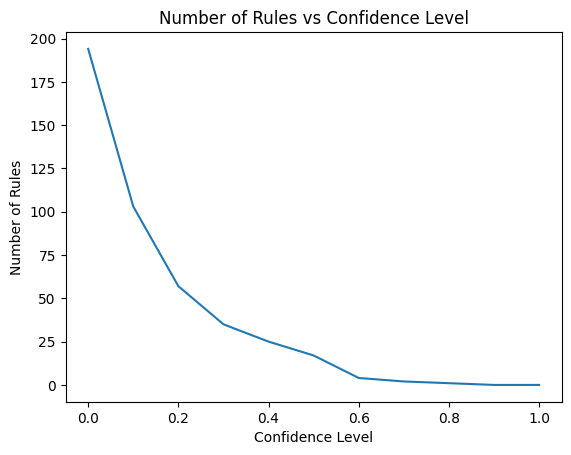

In [ ]:
# your code goes here
freq_itemsets = apriori(df, min_support=0.005, use_colnames=True)
conf_levels = [i/10 for i in range(11)]
num_rules = []
for conf in conf_levels:
    rules = association_rules(freq_itemsets, metric="confidence", min_threshold=conf)
    num_rules.append(len(rules))

plt.plot(conf_levels, num_rules)
plt.title('Number of Rules vs Confidence Level')
plt.xlabel('Confidence Level')
plt.ylabel('Number of Rules')
plt.show()

Q15. What value would you choose for the minimum confidence threshold based on the previous plot? Explain why as a comment.

Display the rules generated for the your chosen value. Take a look at the generated rules. Are they interesting? As a comment, explain why or why not.

In [ ]:
# I would choose a confidence level of 0.5 because it is the elbow of the curve
# and it is the point where the number of rules starts to level out
# your code goes here
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.5)
print(rules)

# the rules are interesting because it seems like every single one has a
# conequence of coffee, which makes sense as coffee is a very commonly bought
# item, especially bought with other treats like cake or cookies

              antecedents consequents  antecedent support  consequent support  \
0             (Alfajores)    (Coffee)            0.036344            0.478394   
1                  (Cake)    (Coffee)            0.103856            0.478394   
2               (Cookies)    (Coffee)            0.054411            0.478394   
3     (Hearty & Seasonal)    (Coffee)            0.010565            0.478394   
4         (Hot chocolate)    (Coffee)            0.058320            0.478394   
5        (Jammie Dodgers)    (Coffee)            0.013207            0.478394   
6                 (Juice)    (Coffee)            0.038563            0.478394   
7      (Keeping It Local)    (Coffee)            0.006656            0.478394   
8             (Medialuna)    (Coffee)            0.061807            0.478394   
9                (Pastry)    (Coffee)            0.086107            0.478394   
10                (Salad)    (Coffee)            0.010460            0.478394   
11             (Sandwich)   

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
